In [3]:
import numpy as np
import pandas as pd

In [4]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [5]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
match.shape

(1095, 20)

In [7]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [79]:
total_score_df = (
    delivery.groupby(["match_id", "inning"])["total_runs"]
    .sum()
    .reset_index()
)

In [9]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [10]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [11]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [12]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [13]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [14]:
teams = [
    'Royal Challengers Bangalore',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Chennai Super Kings',
    'Delhi Capitals',
    'Kings XI Punjab',
    'Lucknow Super Giants',
    'Rajasthan Royals'
]

In [15]:

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [16]:

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df.shape

(645, 22)

In [18]:

match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,...,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin,335987,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1426294,2024,Delhi,2024-05-07,League,Kuldeep Yadav,"Arun Jaitley Stadium, Delhi",Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,runs,20.0,222.0,20.0,N,NaN,KN Ananthapadmanabhan,UV Gandhe,1426294,221
1083,1426298,2024,Kolkata,2024-05-11,League,CV Varun,"Eden Gardens, Kolkata",Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,...,runs,18.0,158.0,16.0,N,NaN,UV Gandhe,Vinod Seshan,1426298,157
1084,1426299,2024,Chennai,2024-05-12,League,Simarjeet Singh,"MA Chidambaram Stadium, Chepauk, Chennai",Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,...,wickets,5.0,142.0,20.0,N,NaN,R Pandit,YC Barde,1426299,141
1086,1426302,2024,Delhi,2024-05-14,League,I Sharma,"Arun Jaitley Stadium, Delhi",Delhi Capitals,Lucknow Super Giants,Lucknow Super Giants,...,runs,19.0,209.0,20.0,N,NaN,A Totre,Vinod Seshan,1426302,208


In [19]:

match_df = match_df[['match_id','city','winner','total_runs']]

In [20]:
delivery_df = match_df.merge(delivery,on='match_id')

In [80]:
delivery_df = delivery_df[delivery_df["inning"] == 2].copy()

In [22]:

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153352,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,3,Ishan Kishan,Naveen-ul-Haq,Naman Dhir,0,0,0,NaN,1,Ishan Kishan,bowled,NaN
153353,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,4,R Shepherd,Naveen-ul-Haq,Naman Dhir,0,1,1,wides,0,NaN,NaN,NaN
153354,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,5,R Shepherd,Naveen-ul-Haq,Naman Dhir,1,0,1,NaN,0,NaN,NaN,NaN
153355,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,6,Naman Dhir,Naveen-ul-Haq,R Shepherd,0,0,0,NaN,0,NaN,NaN,NaN


In [23]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [24]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153352,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,3,Ishan Kishan,...,Naman Dhir,0,0,0,NaN,1,Ishan Kishan,bowled,NaN,188
153353,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,4,R Shepherd,...,Naman Dhir,0,1,1,wides,0,NaN,NaN,NaN,189
153354,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,5,R Shepherd,...,Naman Dhir,1,0,1,NaN,0,NaN,NaN,NaN,190
153355,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,6,Naman Dhir,...,R Shepherd,0,0,0,NaN,0,NaN,NaN,NaN,190


In [25]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [81]:
delivery_df["balls_bowled"] = (delivery_df["over"] * 6) + delivery_df["ball"]
delivery_df["balls_left"] = 120 - delivery_df["balls_bowled"]

In [82]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,1,221,119,10,-1.200000,10.608000,0,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,2,220,118,10,-3.000000,10.645161,0,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,2,220,117,10,-4.000000,10.731707,0,3
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,3,219,116,10,-9.000000,10.770492,0,4
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,4,218,115,10,-24.000000,10.809917,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153352,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,3,Ishan Kishan,...,bowled,NaN,188,26,3,4,10.162162,17.333333,0,117
153353,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,4,R Shepherd,...,NaN,NaN,189,25,2,4,10.125000,18.750000,0,118
153354,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,5,R Shepherd,...,NaN,NaN,190,24,1,4,10.088496,20.571429,0,119
153355,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,6,Naman Dhir,...,NaN,NaN,190,24,0,4,10.000000,24.000000,0,120


In [83]:
# convert to 0/1 correctly
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].fillna("0")
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].apply(lambda x: 0 if x == "0" else 1)

# cumulative wickets
delivery_df["wickets"] = delivery_df.groupby("match_id")["player_dismissed"].cumsum()

# wickets remaining (max 10)
delivery_df["wickets"] = (10 - delivery_df["wickets"]).clip(lower=0)

delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,1,221,119,9,-1.2,10.608000,0,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,2,220,118,8,-3.0,10.645161,0,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,2,220,117,7,-4.0,10.731707,0,3
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,3,219,116,6,-9.0,10.770492,0,4
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,4,218,115,5,-24.0,10.809917,0,5


In [84]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
153352,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,3,Ishan Kishan,...,bowled,NaN,188,26,3,0,10.162162,17.333333,0,117
153353,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,4,R Shepherd,...,NaN,NaN,189,25,2,0,10.125000,18.750000,0,118
153354,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,5,R Shepherd,...,NaN,NaN,190,24,1,0,10.088496,20.571429,0,119
153355,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,6,Naman Dhir,...,NaN,NaN,190,24,0,0,10.000000,24.000000,0,120
153356,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,7,Naman Dhir,...,NaN,NaN,196,18,-1,0,10.226087,21.600000,0,121


In [85]:
# crr = runs/overs
delivery_df["crr"] = (delivery_df["current_score"] * 6) / delivery_df["balls_bowled"].replace(0,1)

In [86]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,1,221,119,9,6.000000,10.608000,0,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,2,220,118,8,6.000000,10.645161,0,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,2,220,117,7,4.000000,10.731707,0,3
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,3,219,116,6,4.500000,10.770492,0,4
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,4,218,115,5,4.800000,10.809917,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153352,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,3,Ishan Kishan,...,bowled,NaN,188,26,3,0,9.641026,17.333333,0,117
153353,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,4,R Shepherd,...,NaN,NaN,189,25,2,0,9.610169,18.750000,0,118
153354,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,5,R Shepherd,...,NaN,NaN,190,24,1,0,9.579832,20.571429,0,119
153355,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,6,Naman Dhir,...,NaN,NaN,190,24,0,0,9.500000,24.000000,0,120


In [88]:
delivery_df["rrr"] = (delivery_df["runs_left"] * 6) / delivery_df["balls_left"].replace(0,1)


In [89]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result,balls_bowled
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,1,221,119,9,6.000000,11.142857,0,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,2,220,118,8,6.000000,11.186441,0,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,2,220,117,7,4.000000,11.282051,0,3
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,3,219,116,6,4.500000,11.327586,0,4
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,4,218,115,5,4.800000,11.373913,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153352,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,3,Ishan Kishan,...,bowled,NaN,188,26,3,0,9.641026,52.000000,0,117
153353,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,4,R Shepherd,...,NaN,NaN,189,25,2,0,9.610169,75.000000,0,118
153354,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,5,R Shepherd,...,NaN,NaN,190,24,1,0,9.579832,144.000000,0,119
153355,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,6,Naman Dhir,...,NaN,NaN,190,24,0,0,9.500000,144.000000,0,120


In [34]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [35]:

delivery_df['result'] = delivery_df.apply(result,axis=1)

In [36]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,1,221,125,10,-1.200000,10.608000,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,2,220,124,10,-3.000000,10.645161,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,2,220,123,10,-4.000000,10.731707,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,3,219,122,10,-9.000000,10.770492,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,4,218,121,10,-24.000000,10.809917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153352,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,3,Ishan Kishan,...,1,bowled,NaN,188,26,9,4,10.162162,17.333333,0
153353,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,4,R Shepherd,...,0,NaN,NaN,189,25,8,4,10.125000,18.750000,0
153354,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,5,R Shepherd,...,0,NaN,NaN,190,24,7,4,10.088496,20.571429,0
153355,1426305,Mumbai,Lucknow Super Giants,214,2,Mumbai Indians,Lucknow Super Giants,19,6,Naman Dhir,...,0,NaN,NaN,190,24,6,4,10.000000,24.000000,0


In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib

In [97]:
final_df = delivery_df[['batting_team','bowling_team','city',
                        'runs_left','balls_left','wickets','total_runs_x',
                        'crr','rrr','result']].copy()

In [ ]:
final_df = final_df.sample(frac=1, random_state=1)

In [100]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
41505,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,114,49,0,195,6.84507,13.959184,0


In [101]:

final_df.dropna(inplace=True)

In [102]:

final_df = final_df[final_df['balls_left'] != 0]

In [103]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [104]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(0)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    transformers=[
        ('trf',
         OneHotEncoder(sparse_output=False, drop='first'),
         ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [106]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
1645,Mumbai Indians,Kings XI Punjab,Chandigarh,84,36,0,182,7.000000,14.000000
78374,Delhi Daredevils,Kolkata Knight Riders,Kolkata,133,78,0,171,5.428571,10.230769
53313,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,71,88,0,117,8.625000,4.840909
18385,Rajasthan Royals,Delhi Daredevils,Bloemfontein,107,69,0,150,5.058824,9.304348
39288,Kings XI Punjab,Rajasthan Royals,Jaipur,155,94,0,191,8.307692,9.893617
...,...,...,...,...,...,...,...,...,...
134234,Delhi Capitals,Royal Challengers Bangalore,Mumbai,83,40,0,189,7.950000,12.450000
1864,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,66,64,0,135,7.392857,6.187500
53795,Chennai Super Kings,Rajasthan Royals,Chennai,115,72,0,185,8.750000,9.583333
92270,Delhi Daredevils,Rajasthan Royals,Jaipur,138,106,0,153,6.428571,7.811321


In [107]:
import numpy as np

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.isin([np.inf, -np.inf]).any()


batting_team    False
bowling_team    False
city            False
runs_left       False
balls_left      False
wickets         False
total_runs_x    False
crr             False
rrr             False
dtype: bool

In [108]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)


In [109]:
X_train.isna().sum()


batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
dtype: int64

In [112]:
X_train = X_train.fillna(0)


In [113]:

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [114]:
pipe.fit(X_train,y_train)


d:\DATA SCIENCE\PYTHON\venv\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [116]:
joblib.dump(pipe, "pipe.pkl")

['pipe.pkl']

In [125]:
import numpy as np

X_test = X_test.replace([np.inf, -np.inf], np.nan)


In [126]:
X_test.isna().sum()


batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
dtype: int64

In [127]:
X_test = X_test.fillna(0)


In [128]:
y_pred = pipe.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8104057072854364

In [130]:

pipe.predict_proba(X_test)[10]

array([0.97232497, 0.02767503])

In [58]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [ ]:
def match_progression(x_df, match_id, pipe):
    # Filter rows for this match
    match = x_df[x_df['match_id'] == match_id]

    if match.empty:
        print(f"No data found for match_id = {match_id}")
        return None, None

    # DYNAMIC END-OF-OVER SELECTION
    # Select LAST ball of each over (works even if balls are 1-5, or overs start at 0)
    match = (
        match.groupby('over')
             .apply(lambda x: x[x['ball'] == x['ball'].max()])
             .reset_index(drop=True)
    )

    if match.empty:
        print(f"No valid over-end balls found for match_id = {match_id}")
        return None, None

    # SELECT FEATURES
    features = [
        'batting_team', 'bowling_team', 'city',
        'runs_left', 'balls_left', 'wickets',
        'total_runs_x', 'crr', 'rrr'
    ]

    temp_df = match[features].copy()

    # CLEAN DATA (Fix Inf / NaN)
    temp_df = temp_df.replace([np.inf, -np.inf], np.nan)
    temp_df = temp_df.fillna(0)

    # Clip extreme values
    if 'crr' in temp_df.columns and 'rrr' in temp_df.columns:
        temp_df[['crr', 'rrr']] = temp_df[['crr', 'rrr']].clip(-50, 50)

    # REMOVE zero-ball rows
    temp_df = temp_df[temp_df['balls_left'] > 0]

    if temp_df.empty:
        print(f"No valid prediction rows for match_id = {match_id}")
        return None, None

    # PREDICT WIN/LOSE PROBABILITY
    result = pipe.predict_proba(temp_df)

    temp_df['lose'] = np.round(result[:, 0] * 100, 1)
    temp_df['win']  = np.round(result[:, 1] * 100, 1)


    # END OF OVER INDEX
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # TARGET CALCULATION
    target = int(temp_df['total_runs_x'].iloc[0])

    # RUNS SCORED EACH OVER
    runs_left = temp_df['runs_left'].tolist()
    prev_runs_left = [target] + runs_left[:-1]

    temp_df['runs_after_over'] = np.array(prev_runs_left) - np.array(runs_left)


    # WICKETS FALLEN EACH OVER
    wkts = temp_df['wickets'].tolist()
    prev_wkts = [10] + wkts[:-1]

    temp_df['wickets_in_over'] = np.array(prev_wkts) - np.array(wkts)


    # OUTPUT
    out = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]

    print("TARGET:", target)
    return out, target


In [60]:
delivery_df['match_id'].unique()



array([ 335982,  335983,  335984,  335985,  335987,  335989,  335991,
        335992,  335993,  335995,  335996,  335997,  335998,  336000,
        336001,  336003,  336004,  336005,  336006,  336008,  336009,
        336010,  336013,  336015,  336016,  336017,  336018,  336021,
        336022,  336023,  336025,  336026,  336027,  336028,  336029,
        336032,  336033,  336035,  336036,  336012,  336019,  336038,
        336039,  336040,  392181,  392182,  392183,  392185,  392186,
        392189,  392190,  392191,  392194,  392195,  392197,  392198,
        392199,  392200,  392202,  392203,  392204,  392206,  392207,
        392208,  392210,  392211,  392213,  392214,  392215,  392217,
        392218,  392219,  392221,  392222,  392224,  392225,  392226,
        392227,  392230,  392231,  392232,  392233,  392234,  392235,
        392238,  419107,  419108,  419109,  419111,  419112,  419113,
        419114,  419115,  419116,  419118,  419119,  419121,  419122,
        419123,  419

In [131]:
temp_df,target = match_progression(delivery_df,335982,pipe)
temp_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_4076\242890094.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[x['ball'] == x['ball'].max()])


TARGET: 222


,end_of_over,runs_after_over,wickets_in_over,lose,win
0,1,4,7,96.7,3.3
1,2,5,3,97.0,3.0
2,3,3,0,98.2,1.8
3,4,4,0,98.5,1.5
4,5,8,0,98.5,1.5
5,6,2,0,99.1,0.9
6,7,7,0,99.3,0.7
7,8,5,0,99.4,0.6
8,9,5,0,99.6,0.4
9,10,8,0,99.6,0.4


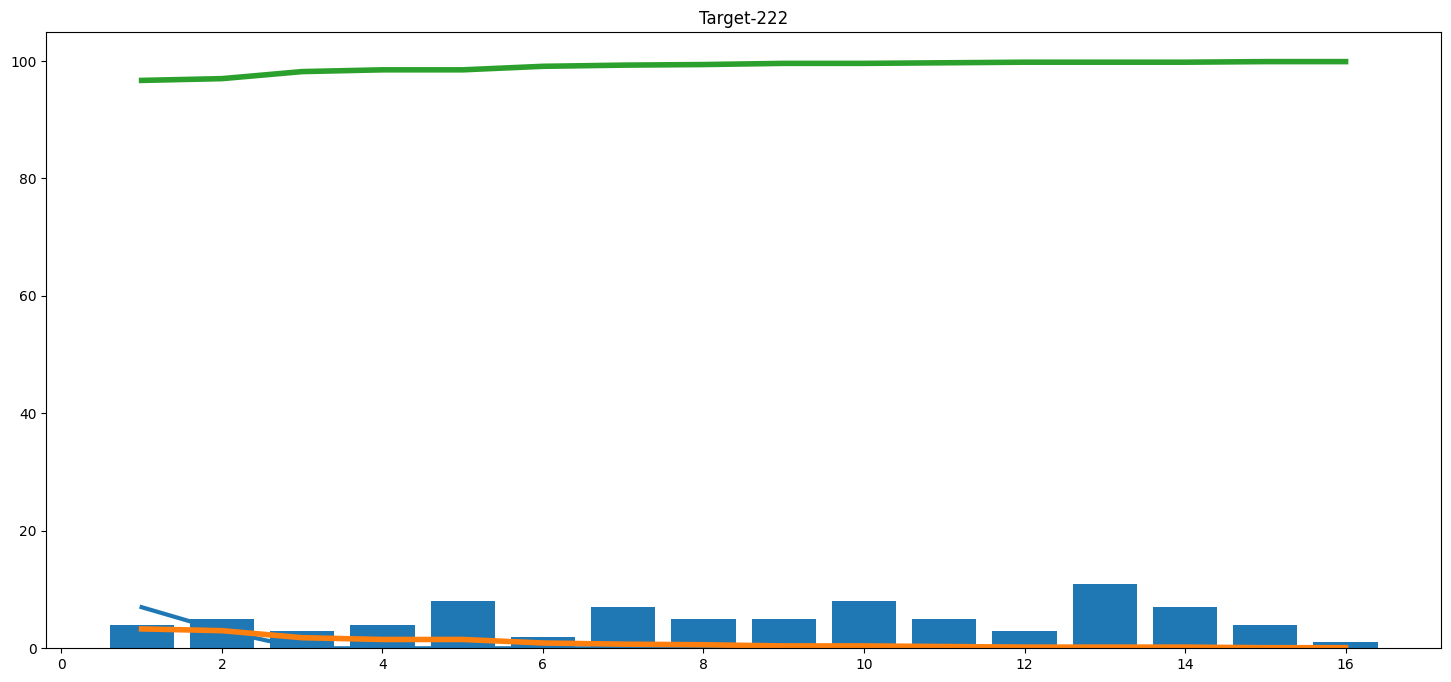

In [132]:
if temp_df is None or temp_df.empty:
    print("No data available for plotting. match_progression returned empty.")
else:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(18,8))
    plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], linewidth=3)
    plt.plot(temp_df['end_of_over'], temp_df['win'], linewidth=4)
    plt.plot(temp_df['end_of_over'], temp_df['lose'], linewidth=4)
    plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
    plt.title('Target-' + str(target))
    plt.show()


In [63]:
teams

['Royal Challengers Bangalore',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Lucknow Super Giants',
 'Rajasthan Royals']

In [64]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Jaipur', 'Chennai',
       'Kolkata', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Dharamsala', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       nan, 'Cuttack', 'Visakhapatnam', 'Bengaluru', 'Indore',
       'Hyderabad', 'Dubai', 'Sharjah', 'Navi Mumbai', 'Lucknow',
       'Guwahati'], dtype=object)

In [133]:
import joblib
pipe = joblib.load("pipe.pkl")

print(pipe)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib

transformer = ColumnTransformer(
    [
        ("trf", OneHotEncoder(drop="first", sparse_output=False),
         ["batting_team", "bowling_team", "city"])
    ],
    remainder="passthrough"
)

pipe = Pipeline([
    ("step1", transformer),
    ("step2", LogisticRegression(solver="liblinear"))
])

pipe.fit(X_train, y_train)

joblib.dump(pipe, "ipl_win_predictor.pkl")
print("Saved as ipl_win_predictor.pkl")


Saved as ipl_win_predictor.pkl


In [137]:
import joblib

pipe = joblib.load("ipl_win_predictor.pkl")
print(type(pipe))


<class 'sklearn.pipeline.Pipeline'>
